This Notebook is saved at C:\Users\Mark

LOADING REQUIRED LIBRARIES

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
from sklearn.pipeline import Pipeline

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
%matplotlib inline

MODULE 1: Importing Data Sets

In [11]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'

In [12]:
df = pd.read_csv(file_name)

In [13]:
# Display first 5 columns of the dataframe
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


__Question 1__

Display the data types of each column using the attribute dtype, then take a screenshot and submit it, include your code in the image.

In [16]:
print(df.columns)

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [17]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [18]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


MODULE 2: Data Wrangling

In [19]:
df1 = df

There are 5 different methods to DROP columns from a dataframe:

Method #1: Drop specific columns from a Dataframe using drop() method.
           df.drop(['C', 'D'], axis = 1, inplace = True)

Method #2: Drop Columns from a Dataframe using iloc[] and drop() method. It drops column @ index 1 but not the column @ index 3
           df.drop(df.iloc[:, 1:3], inplace = True, axis = 1)

Method #3: Drop Columns from a Dataframe using ix() and drop() method.
           # Remove all columns between column name 'B' to 'D' including column 'B' and column 'D'.
           df.drop(df.ix[:, 'B':'D'].columns, axis = 1)

Method #4: Drop Columns from a Dataframe using loc[] and drop() method.
           # Remove all columns between column name 'B' to 'D' including column 'B' and column 'D'.
           df.drop(df.loc[:, 'B':'D'].columns, axis = 1)
Method #5: Drop Columns from a Dataframe by iterative way.
           for col in df.columns:
            if 'A' in col:
            del df[col]

           

__Question 2__

Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Make sure the inplace parameter is set to True

In [32]:
df.drop(['id', 'Unnamed: 0'], axis = 1, inplace = True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [33]:
# We can see we have missing values for the columns  bedrooms and  bathrooms 

print("number of NaN values for the column bedrooms :", df1['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df1['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [34]:
df = df1

We can replace the missing values of the column 'bedrooms' with the mean of the column 'bedrooms'  using the method replace(). Don't forget to set the inplace parameter to True

In [35]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)


We also replace the missing values of the column 'bathrooms' with the mean of the column 'bathrooms'  using the method replace(). Don't forget to set the  inplace  parameter top  True 

In [36]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)


In [37]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


Module 3: Exploratory Data Analysis

__Question 3__
Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.

In [52]:
unique_floor_value_counts = df["floors"].value_counts().to_frame()

__Question 4__
Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers.


<AxesSubplot:xlabel='waterfront', ylabel='price'>

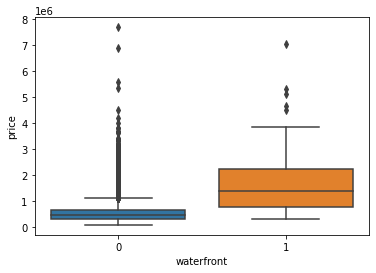

In [55]:
sns.boxplot(x = "waterfront", y = "price", data = df)

__Question 5__
Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

We can use the Pandas method corr() to find the feature other than price that is most correlated with price.


(0.0, 8081250.0)

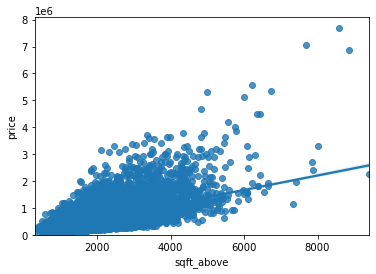

In [57]:
# draw regplot
sns.regplot(x = "sqft_above", y = "price", data = df)
plt.ylim(0,)

In [73]:
# Since the living space in a house has a direct effect on the price of the house, let's find a 
# correlation coefficient between sqft_living and price.

corrM = df[["sqft_living", "price"]].corr()
corrM

,sqft_living,price
sqft_living,1.000000,0.702035
price,0.702035,1.000000


In [72]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

Module 4: Model Development

In [74]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)


0.00046769430149007363

__Question 6__
Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. Take a screenshot of your code and the value of the R^2.


We define the predictor variable and target variable

In [75]:
X = df[['sqft_living']]
Y = df['price']

In [78]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [79]:
# Then we use lm.fit(X, Y) to fit the model
lm.fit(X, Y)

LinearRegression()

In [80]:
# Now we objtain a prediction
Yhat = lm.predict(X)

In [81]:
# In a linear model, intercept is lm.intercept_ and the slope is lm.coef_
print(lm.intercept_)
print(lm.coef_)

-43580.74309447361
[280.6235679]


#### Hence the linear regression equation is fiven by:
# price = -43580.74309447361 + 280.6235679 * sqft_living


In [98]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
print('Price = ' + str(lm.intercept_) + ' + ' + str(lm.coef_) + '* sqft_living')
print('R-Squared = ' + str(lm.score(X, Y, sample_weight = None)))

Price = -43580.74309447361 + [280.6235679]* sqft_living
R-Squared = 0.4928532179037931


__Question 7__

Fit a linear regression model to predict the 'price' using the list of features:

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]  

Then calculate the R^2. Take a screenshot of your code.


In [105]:
features =["floors", "waterfront", "lat" , "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", 
           "sqft_above", "grade", "sqft_living"]
X = df[features]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
print('Intercept = ' + str(lm.intercept_))
print('Array of Slope parameters for features = ' + str(lm.coef_))
print('R-Squared = ' + str(lm.score(X, Y, sample_weight = None)))

Intercept = -32390308.398632627
Array of Slope parameters for features = [-2.92790793e+04  6.02002523e+05  6.72993098e+05 -2.59674430e+04
  6.44145022e+01  6.70824472e+04 -3.22416757e+03  4.44293114e+00
  6.49412866e+01  8.20072277e+04  1.29355790e+02]
R-Squared = 0.6576951666037494


This will help with Question 8
Create a list of tuples, the first element in the tuple contains the name of the estimator:
'scale'
'polynomial'
'model'
The second element in the tuple contains the model constructor
StandardScaler()
PolynomialFeatures(include_bias=False)
LinearRegression()

Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]


__Question 8__

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2.

In [124]:
# import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# pipeline components are StandardScaler, PolynomialFeatures, and LinearRegression
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

# pipeline object is below given Input:
pipe = Pipeline(Input)

# Fitting the object using the list of features
pipe.fit(X,Y)

yhat = pipe.predict(df[features])
print('R-Squared = ' + str(pipe.score(X, yhat)))

R-Squared = 1.0


__NOTES FOR QUESTION 9__

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")
We will split the data into training and testing sets:

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


__Question 9__

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.



In [127]:
# Import cross_val_score from model_selection within sklearn library
from sklearn.model_selection import cross_val_score

# Import linear_model from sklearn
from sklearn import linear_model

# importing module train_test_split fromk sklearn
from sklearn.model_selection import train_test_split

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha = 0.1)

# RidgeModel.fit(X,y)
RidgeModel.fit(x_test, y_test)

yhat = RidgeModel.predict(x_test)
print('R-Squared = ' + str(RidgeModel.score(x_test, yhat)))



R-Squared = 1.0


__Question 10__

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.

Once you complete your notebook you will have to share it. Select the icon on the top right a marked in red in the image below, a dialogue box should open, and select the option all content excluding sensitive code cells


In [128]:
# Import linear_model from sklearn
from sklearn import linear_model

# Import PolynomialFeatures from preprocessing within sklearn
from sklearn.preprocessing import PolynomialFeatures

# importing module train_test_split from sklearn
from sklearn.model_selection import train_test_split

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']
# Let's use 85 percent of the data for training and the rest for testing:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=0)

# Let's use polynomial of degree = 2
pr = PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)

# Import Ridge from linear_model of sklearn
from sklearn.linear_model import Ridge

# Let's create a Ridge regression object, setting the regularization parameter to 0.1
RigeModel=Ridge(alpha=0.1)

RigeModel.fit(x_train_pr, y_train)

yhat = RidgeModel.predict(x_test)
print('R-Squared = ' + str(RidgeModel.score(x_test, yhat)))

R-Squared = 1.0
